<a href="https://colab.research.google.com/github/AlvaroFironze/analyze-data-and-machine-learning/blob/main/%D0%9D%D0%B0%D1%87%D0%B0%D0%BB%D0%BE_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B8_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  85 non-null     object 
 1   N       85 non-null     int64  
 2   X1      85 non-null     float64
 3   X2      85 non-null     float64
 4   X3      85 non-null     float64
 5   X4      85 non-null     float64
 6   X5      85 non-null     float64
 7   X6      85 non-null     float64
 8   X7      85 non-null     float64
 9   X8      85 non-null     float64
 10  X9      85 non-null     float64
 11  X10     85 non-null     float64
 12  X11     85 non-null     float64
 13  X12     85 non-null     float64
 14  X13     85 non-null     float64
 15  X14     85 non-null     float64
 16  X15     85 non-null     float64
 17  X16     85 non-null     float64
 18  X17     85 non-null     float64
 19  X18     85 non-null     float64
 20  X19     85 non-null     float64
 21  X20     85 non-null     float64
dtypes: f

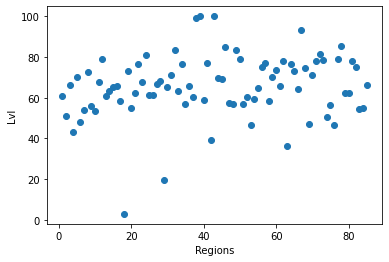

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interpolate,optimize
from scipy.optimize import curve_fit 
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
df=pd.read_csv('/content/drive/MyDrive/2(2)/DataSet1_1.csv',delimiter=';')[:85]
df.describe()
df.info()
plt.xlabel('Regions')
plt.ylabel('Lvl')
plt.scatter(x=df['N'], y=df['X1'])


In [ ]:
def lagranz(x,y,t):
  z=0
  for j in range(len(y)):
    p1=1
    p2=1
    for i in range(len(x)):
      if (i==j):
        p1=p1*1
        p2=p2*1
      else: 
        p1=p1*(t-x[i])
        p2=p2*(x[j]-x[i])
       
    z=z+y[j]*p1/p2
   
  return z

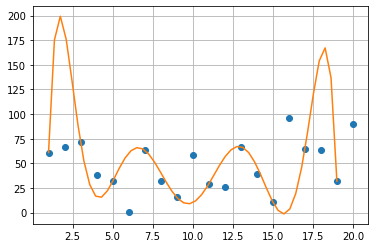

In [ ]:
x=np.linspace(1,20,20)
x1=x[0::2]
y=np.array(df.values.tolist()[0][2:],dtype=float)
y1=y[0::2]
xnew=np.linspace(np.min(x1),np.max(x1),50)
ynew=[lagranz(x1,y1,i) for i in xnew]
plt.plot(x,y,'o',xnew,ynew)
plt.grid(True)
plt.show()
#ЭТО ГЕНИАЛЬНАЯ ХРЕНЬ

In [ ]:
def spl(x,y,t):
  tck = interpolate.splrep(x, y)
  return interpolate.splev(t, tck)

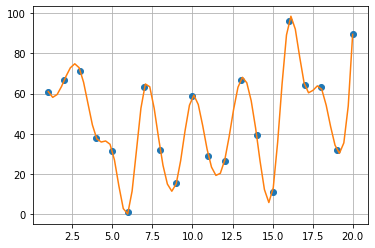

In [ ]:
x=np.linspace(1,20,20)
y=np.array(df.values.tolist()[0][2:],dtype=float)
xnew=np.linspace(np.min(x),np.max(x),70)
ynew=[spl(x,y,i) for i in xnew]
plt.plot(x,y,'o',xnew,ynew)
plt.grid(True)
plt.show()

In [ ]:
def lineA(X,Y):
  X_mean = np.mean(X)
  Y_mean = np.mean(Y)

  num = 0
  den = 0
  for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
  m = num / den
  c = Y_mean - m*X_mean
  func={
      'c':c,
      'm':m
  }
  return func

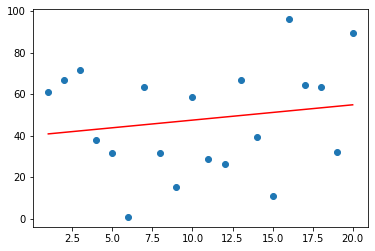

In [ ]:
x=np.linspace(1,20,20)
y=np.array(df.values.tolist()[0][2:],dtype=float)
func=lineA(x,y)
Y_pred = func['m']*x + func['c']

plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

In [ ]:
def mapping1(values_x, a, b, c): 
    return a * values_x**2 + b * values_x + c 

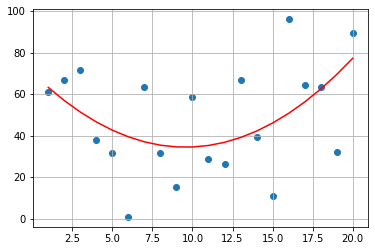

In [ ]:
x=np.linspace(1,20,20)
y=np.array(df.values.tolist()[0][2:],dtype=float)
args, _ = curve_fit(mapping1, x, y) 
a, b, c = args[0], args[1], args[2] 
y_fit1 = mapping1(x, a, b, c)
plt.scatter(x, y) 
plt.plot(x, y_fit1,color='red') 
plt.grid(True) 
plt.show() 

ValueError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3019 non-null   datetime64[ns]
 1   Open    3019 non-null   float64       
 2   High    3019 non-null   float64       
 3   Low     3019 non-null   float64       
 4   Close   3019 non-null   float64       
 5   Volume  3019 non-null   int64         
 6   Name    3019 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 165.2+ KB


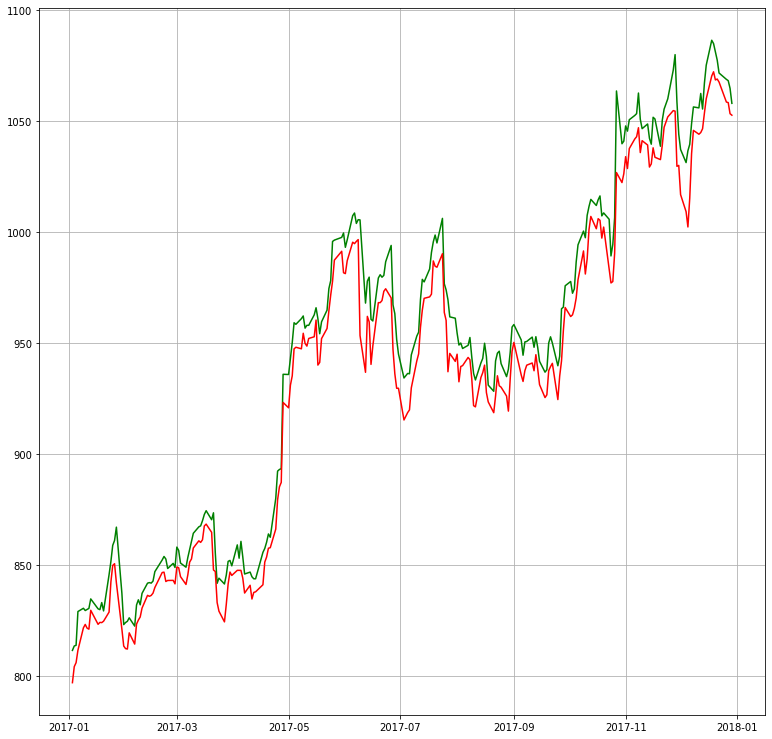

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/2(2)/DataSet1_3.csv',delimiter=',', parse_dates=['Date'])
df.describe()
df.info()
df.tail()
df=df[((df["Date"])>datetime(2016,12,31))]
plt.figure(figsize=(13, 13))
plt.plot(df["Date"],df["High"],label='max',color='green')
plt.plot(df["Date"],df["Low"],label='min',color='red')
plt.grid()
plt.show()


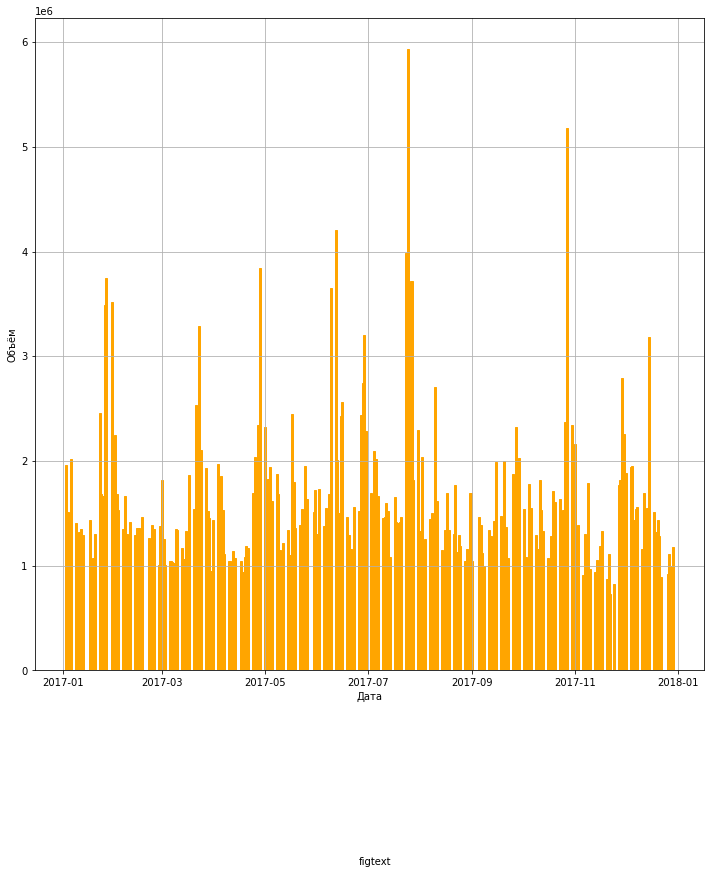

In [ ]:
plt.figure(figsize=(12, 12))
plt.figtext(0.5, -0.1, "figtext")
plt.bar(df["Date"],df["Volume"],label='volume',width=1.2,edgecolor='orange',color='orange')
plt.grid()
plt.ylabel('Объём')
plt.xlabel('Дата')
plt.show()

In [ ]:
from datetime import datetime, timedelta
epoch = datetime(2015, 1, 1, 0, 0, 0)

def timestamp_microsecond(utc_time):
    utc_time=datetime.strptime(str(utc_time), '%Y-%m-%d %H:%M:%S')
    td = utc_time - epoch
    return (td.days ) 
def microsecond_timestamp(utc_time):
    td=epoch+timedelta(days=int(utc_time))
    td
    return (pd.to_datetime(td) ) 



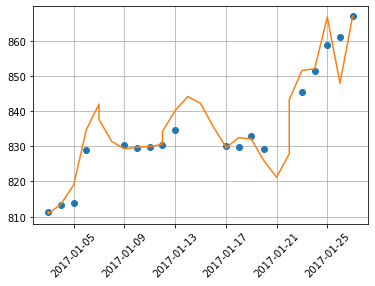

In [ ]:
x=np.array([timestamp_microsecond(i) for i in df["Date"][:18]])
y=np.array(df["High"][:18],dtype=float)
xnew=np.linspace(np.min(x),np.max(x),30)
ynew=[lagranz(x,y,i) for i in xnew]
plt.plot([microsecond_timestamp(i) for i in x],y,'o',[microsecond_timestamp(i) for i in xnew],ynew)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

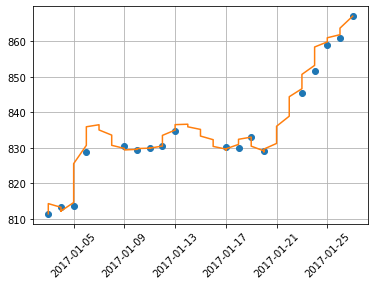

In [ ]:
x=np.array([timestamp_microsecond(i) for i in df["Date"][:18]])
y=np.array(df["High"][:18],dtype=float)
xnew=np.linspace(np.min(x),np.max(x),70)
ynew=[spl(x,y,i) for i in xnew]
plt.plot([microsecond_timestamp(i) for i in x],y,'o',[microsecond_timestamp(i) for i in xnew],ynew)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

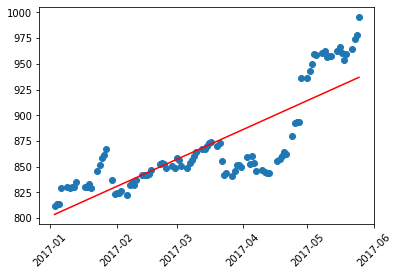

In [ ]:
x=np.array([timestamp_microsecond(i) for i in df["Date"][:100]])
y=np.array(df["High"][:100],dtype=float)
func=lineA(x,y)
Y_pred = func['m']*x + func['c']
plt.xticks(rotation=45)
plt.scatter([microsecond_timestamp(i) for i in x], y) 
plt.plot([microsecond_timestamp(i) for i in [min(x), max(x)]], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

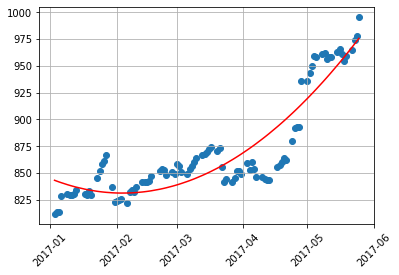

In [ ]:
x=np.array([timestamp_microsecond(i) for i in df["Date"][:100]])
y=np.array(df["High"][:100],dtype=float)
args, _ = curve_fit(mapping1, x, y) 
a, b, c = args[0], args[1], args[2] 
y_fit1 = mapping1(x, a, b, c)
plt.scatter([microsecond_timestamp(i) for i in x], y) 
plt.plot([microsecond_timestamp(i) for i in x], y_fit1,color='red') 
plt.grid(True) 
plt.xticks(rotation=45)
plt.show() 

LinearRegression()

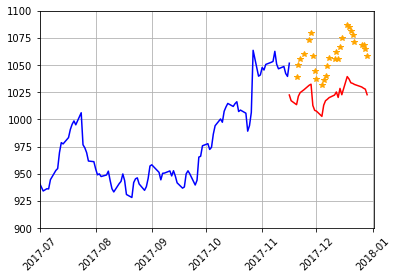

In [ ]:
projection = 30
df['predict'] = df['High'].shift(-projection)
X = df[['High']+['Open']+['Volume']]
y = df['predict']
X = X[:-projection]
y = y[:-projection]
X_train=X[:int(0.8*len(X))]
X_test=X[int(0.8*len(X))+1:]
y_train=y[:int(0.8*len(y))]
y_test=y[int(0.8*len(y))+1:]

liner = LinearRegression()
liner.fit(X_train, y_train)
liner.predict(df[['High']+['Open']+['Volume']][-projection:])
plt.plot(df["Date"][:-projection+1],df['High'][:-projection+1],label='max',color='blue')
plt.plot(df["Date"][-projection+2:],df['High'][-projection+2:],'*',label='max',color='orange',)
plt.plot(df["Date"][-projection:],liner.predict(df[['High']+['Open']+['Volume']][-projection:]),label='pr',color='red')
plt.xticks(rotation=45)
plt.xlim(pd.to_datetime('2017-07-01'),pd.to_datetime('2018-01-02'))
plt.ylim(900,1100)
plt.grid(True) 
LinearRegression()

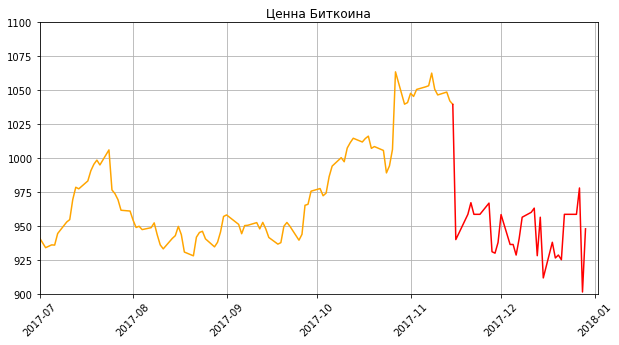

In [ ]:
projection = 30
df['predict'] = df['High'].shift(-projection)
X = df[['High']+['Open']+['Volume']]
y = df['predict']
X = X[:-projection]
y = y[:-projection]
X_train=X[:int(0.8*len(X))]
X_test=X[int(0.8*len(X))+1:]
y_train=y[:int(0.8*len(y))]
y_test=y[int(0.8*len(y))+1:]

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
plt.figure(figsize=(10, 5))
plt.title('Ценна Биткоина')
knn.predict(df[['High']+['Open']+['Volume']][-projection:])
plt.plot(df["Date"][:-projection],df['High'][:-projection],label='max',color='orange')
plt.plot(df["Date"][-projection-1:], np.insert((knn.predict(df[['High']+['Open']+['Volume']][-projection:])),0,df["High"][-projection-1:-projection].values),label='pr',color='red')
plt.xticks(rotation=45)
plt.xlim(pd.to_datetime('2017-07-01'),pd.to_datetime('2018-01-02'))
plt.ylim(900,1100)
plt.grid(True) 


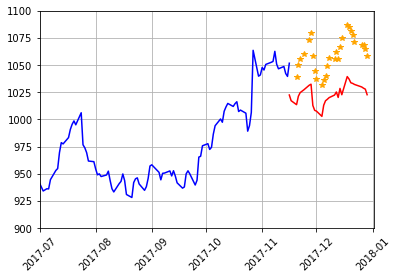

In [ ]:
projection = 30
df['predict'] = df['High'].shift(-projection)
X = df[['High']+['Open']+['Volume']]
y = df['predict']
X = X[:-projection]
y = y[:-projection]
X_train=X[:int(0.8*len(X))]
X_test=X[int(0.8*len(X))+1:]
y_train=y[:int(0.8*len(y))]
y_test=y[int(0.8*len(y))+1:]

lasso = Lasso(alpha=0.01,max_iter=5000) 
lasso.fit(X_train, y_train)
lasso.predict(df[['High']+['Open']+['Volume']][-projection:])
plt.plot(df["Date"][-projection+2:],df['High'][-projection+2:],'*',label='max',color='orange',)
plt.plot(df["Date"][:-projection+1],df['High'][:-projection+1],label='max',color='blue')
plt.plot(df["Date"][-projection:],lasso.predict(df[['High']+['Open']+['Volume']][-projection:]),label='pr',color='red')
plt.xticks(rotation=45)
plt.xlim(pd.to_datetime('2017-07-01'),pd.to_datetime('2018-01-02'))
plt.ylim(900,1100)
plt.grid(True) 

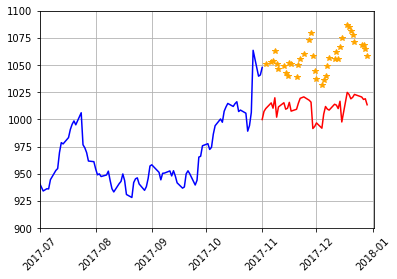

In [ ]:
projection = 41
df['predict'] = df['High'].shift(-projection)
X = df[['High']+['Open']+['Volume']]
y = df['predict']
X = X[:-projection]
y = y[:-projection]
X_train=X[:int(0.8*len(X))]
X_test=X[int(0.8*len(X))+1:]
y_train=y[:int(0.8*len(y))]
y_test=y[int(0.8*len(y))+1:]

ridge = Ridge(alpha=0.01,max_iter=5000) 
ridge.fit(X_train, y_train)
ridge.predict(df[['High']+['Open']+['Volume']][-projection:])
plt.plot(df["Date"][-projection+2:],df['High'][-projection+2:],'*',label='max',color='orange',)
plt.plot(df["Date"][:-projection+1],df['High'][:-projection+1],label='max',color='blue')
plt.plot(df["Date"][-projection:],ridge.predict(df[['High']+['Open']+['Volume']][-projection:]),label='pr',color='red')
plt.xticks(rotation=45)
plt.xlim(pd.to_datetime('2017-07-01'),pd.to_datetime('2018-01-02'))
plt.ylim(900,1100)
plt.grid(True) 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff25e5c0990>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff25e5c5450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff25e5c0450>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff25e5c5f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff25e5cd490>,
 'means': []}

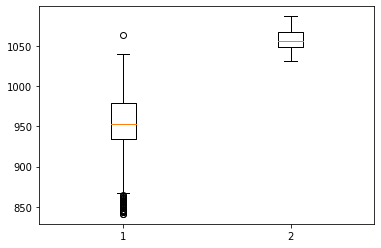

In [ ]:
plt.boxplot([y_train, y_test])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f924815b2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f924815bd50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f924815fd10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f92480de850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f92480ded90>],
 'means': []}

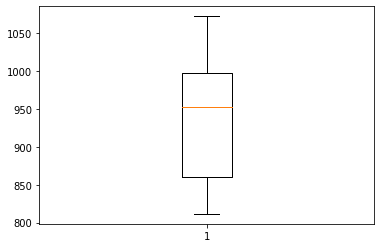

In [ ]:
plt.boxplot(np.insert((ridge.predict(df[['High']+['Open']+['Volume']][-projection:])),0,df["High"][:-projection-1].values))

In [ ]:

observed_data = ridge.predict(df[['High']+['Open']+['Volume']][-projection:])
expected_data = y_test

# Chi-Square Goodness of Fit Test
#def chi(observed_data,expected_data):
stat, p, dof, expected = stats.chi2_contingency([observed_data,expected_data])
print(p) 

1.0


In [ ]:

def fish(observed_data,expected_data):
  f=np.var(observed_data,ddof=1)/np.var(expected_data, ddof=1)
  p=1-stats.f.cdf(f,observed_data.size-1,expected_data.size-1)
  return(p)

In [ ]:
import scipy.stats as stats
def stud(observed_data,expected_data):
  tval2,p= stats.ttest_ind(observed_data,expected_data)

  return(p)

In [ ]:
data = {'x2': [chi(liner.predict(df[['High']+['Open']+['Volume']][-projection:]),expected_data),
               chi(knn.predict(df[['High']+['Open']+['Volume']][-projection:]),expected_data),
               chi(lasso.predict(df[['High']+['Open']+['Volume']][-projection:]),expected_data),
               chi(ridge.predict(df[['High']+['Open']+['Volume']][-projection:]),expected_data)],
        'fish': [fish(liner.predict(df[['High']+['Open']+['Volume']][-projection:]),expected_data),
                 fish(knn.predict(df[['High']+['Open']+['Volume']][-projection:]),expected_data),
                 fish(lasso.predict(df[['High']+['Open']+['Volume']][-projection:]),expected_data),
                 fish(ridge.predict(df[['High']+['Open']+['Volume']][-projection:]),expected_data)],
        'stud':[stud(liner.predict(df[['High']+['Open']+['Volume']][-projection:]),expected_data),
                 stud(knn.predict(df[['High']+['Open']+['Volume']][-projection:]),expected_data),
                 stud(lasso.predict(df[['High']+['Open']+['Volume']][-projection:]),expected_data),
                 stud(ridge.predict(df[['High']+['Open']+['Volume']][-projection:]),expected_data)]
        }


dr = pd.DataFrame(data)
dr

,x2,fish,stud
0,1.000000,0.999501,1.062910e-22
1,0.997826,0.000407,8.148329e-36
2,1.000000,0.999500,1.064202e-22
3,1.000000,0.998804,4.025295e-29


In [ ]:
x=np.array([timestamp_microsecond(i) for i in df["Date"][:100]])
y=np.array(df["High"][:100],dtype=float)
lasso = Lasso(alpha=0.01) 
lasso.fit(x,y) 
xnew=lasso.predict()
ynew=lasso.predict()
plt.scatter([microsecond_timestamp(i) for i in x], y) 
plt.plot([microsecond_timestamp(i) for i in x], y_fit1,color='red') 
plt.grid(True) 
plt.xticks(rotation=45)
plt.show() 

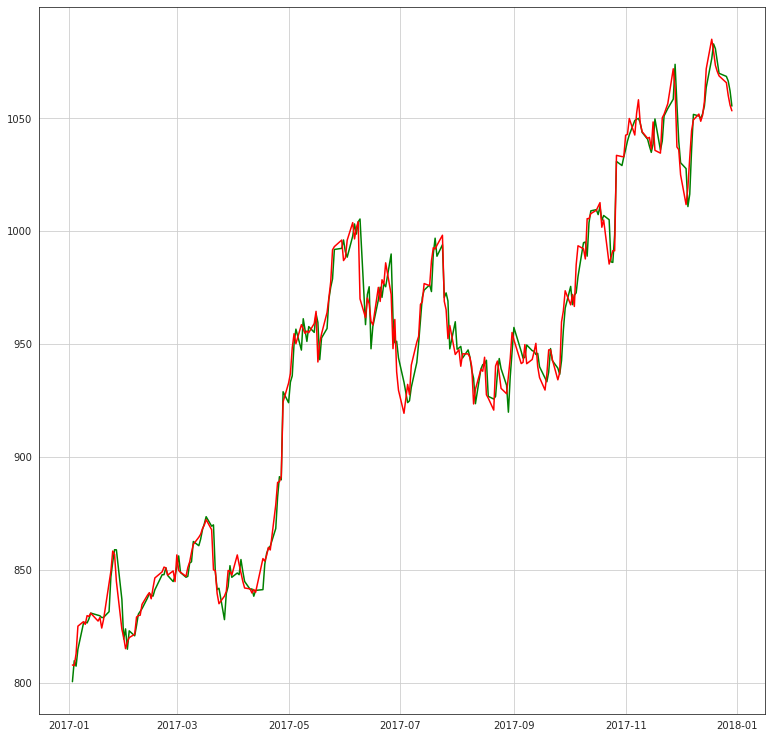

In [ ]:

plt.figure(figsize=(13, 13))
plt.plot(df["Date"],df["Open"],label='max',color='green')
plt.plot(df["Date"],df["Close"],label='min',color='red')
plt.grid()
plt.show()

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/2(2)/DataSet1_4.csv',delimiter=',')
df=df.drop(columns='Year')
df = df.fillna(0)
plt.figure(figsize=(13, 13))
df.tail()
df=df.groupby(['Code']).agg('max')
df["Total confirmed cases of COVID-19"]=df["Total confirmed cases of COVID-19"].astype(int)
df=df[16:]

df.head(300)




,Entity,Day,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)",Total confirmed cases of COVID-19,Continent
Code,,,,,
AUS,Australia,2022-04-24,109214.714,5719311,Oceania
AUT,Austria,2022-04-24,45087.143,4104859,Europe
AZE,Azerbaijan,2022-04-24,7050.143,792496,Asia
BDI,Burundi,2022-04-24,1162.000,38887,Africa
BEL,Belgium,2022-04-24,52137.571,4015791,Europe
...,...,...,...,...,...
WSM,Samoa,2022-04-24,398.667,7185,Oceania
YEM,Yemen,2022-04-24,109.429,11818,Asia
ZAF,South Africa,2022-04-24,23437.143,3762911,Africa


<Figure size 936x936 with 0 Axes>

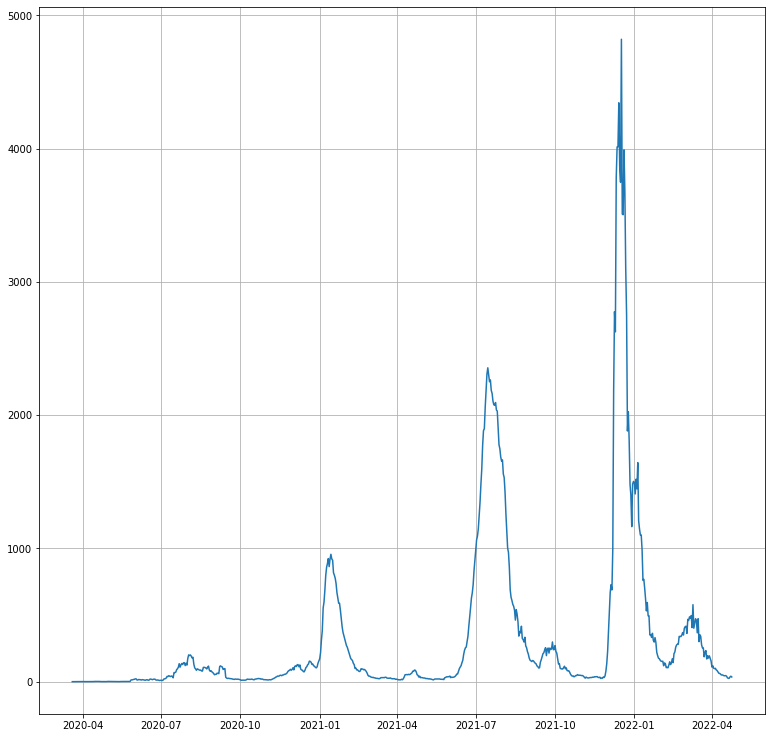

In [ ]:

df=pd.read_csv('/content/drive/MyDrive/2(2)/DataSet1_4.csv',delimiter=',', parse_dates=['Day'])
df=df.drop(columns='Year')
df = df.fillna(0)
df=df[((df["Code"])=='ZWE')]
plt.figure(figsize=(13, 13))
plt.plot(df['Day'],df['Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)'])
plt.grid()

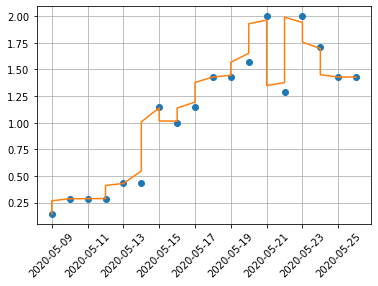

In [ ]:
x=np.array([timestamp_microsecond(i) for i in df['Day'][50:68]])
y=np.array(df['Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)'][50:68],dtype=float)

temp = interpolate.interp1d(x, y)
xnew=np.linspace(np.min(x),np.max(x),80)
ynew = temp(xnew)
plt.plot([microsecond_timestamp(i) for i in x],y,'o',[microsecond_timestamp(i) for i in xnew],ynew)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

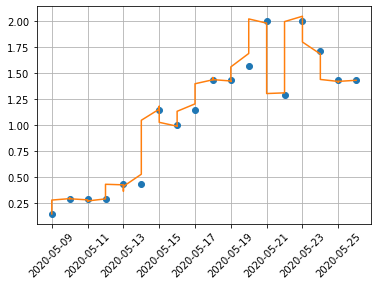

In [ ]:
x=np.array([timestamp_microsecond(i) for i in df['Day'][50:68]])
y=np.array(df['Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)'][50:68],dtype=float)

xnew=np.linspace(np.min(x),np.max(x),80)
ynew=[spl(x,y,i) for i in xnew]
plt.plot([microsecond_timestamp(i) for i in x],y,'o',[microsecond_timestamp(i) for i in xnew],ynew)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

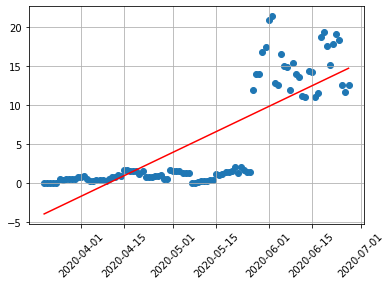

In [ ]:
x=np.array([timestamp_microsecond(i) for i in df['Day'][:100]])
y=np.array(df['Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)'][:100],dtype=float)
func=lineA(x,y)
Y_pred = func['m']*x + func['c']

plt.scatter([microsecond_timestamp(i) for i in x], y) 
plt.plot([microsecond_timestamp(i) for i in [min(x), max(x)]], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

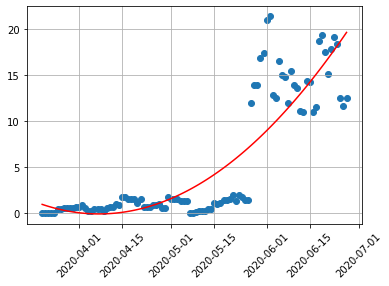

In [ ]:
x=np.array([timestamp_microsecond(i) for i in df['Day'][:100]])
y=np.array(df['Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)'][:100],dtype=float)
args, _ = curve_fit(mapping1, x, y) 
a, b, c = args[0], args[1], args[2] 
y_fit1 = mapping1(x, a, b, c)
plt.scatter([microsecond_timestamp(i) for i in x], y) 
plt.plot([microsecond_timestamp(i) for i in x], y_fit1,color='red') 
plt.grid(True) 
plt.xticks(rotation=45)
plt.show() 